# An√°lisis Exploratorio de Datos Clim√°ticos para Agricultura

## Estudio del Impacto Clim√°tico en la Agricultura Espa√±ola

### Objetivos del An√°lisis:
1. **Caracterizaci√≥n clim√°tica**: Identificar patrones de temperatura, precipitaci√≥n y otros factores clim√°ticos
2. **Zonificaci√≥n agroclim√°tica**: Definir zonas con caracter√≠sticas similares para diferentes cultivos
3. **An√°lisis de riesgos**: Identificar eventos extremos que afecten la agricultura
4. **Tendencias temporales**: Evaluar cambios clim√°ticos a largo plazo
5. **√çndices agroclim√°ticos**: Calcular indicadores espec√≠ficos para la agricultura

---

## 1. Importaci√≥n de Librer√≠as y Configuraci√≥n

In [1]:
# Librer√≠as b√°sicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n para matplotlib (por si se necesita)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Configuraci√≥n de Plotly
import plotly.io as pio
pio.renderers.default = "browser"  # Para mostrar en navegador si es necesario

# Configuraci√≥n para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("‚úì Librer√≠as importadas correctamente")
print("‚úì Plotly configurado para gr√°ficos interactivos")
print("‚úì Pandas configurado para visualizaci√≥n completa")

‚úì Librer√≠as importadas correctamente
‚úì Plotly configurado para gr√°ficos interactivos
‚úì Pandas configurado para visualizaci√≥n completa


## 2. Carga y Exploraci√≥n Inicial de los Datos

In [2]:
# Cargar los datos clim√°ticos limpios
clima_df = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Data\Base de datos\clima_limpio.csv')

# Convertir DATE a datetime
clima_df['DATE'] = pd.to_datetime(clima_df['DATE'])

# Informaci√≥n b√°sica del dataset
print("=== INFORMACI√ìN GENERAL DEL DATASET ===")
print(f"Dimensiones: {clima_df.shape}")
print(f"Per√≠odo de datos: {clima_df['DATE'].min()} a {clima_df['DATE'].max()}")
print(f"N√∫mero de estaciones: {clima_df['STATION'].nunique()}")
print(f"A√±os de datos: {clima_df['DATE'].dt.year.nunique()}")

clima_df.head()

=== INFORMACI√ìN GENERAL DEL DATASET ===
Dimensiones: (1619312, 19)
Per√≠odo de datos: 1901-01-01 00:00:00 a 2025-07-13 00:00:00
N√∫mero de estaciones: 88
A√±os de datos: 125


STATION       DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  SP000006155 1942-05-01   36.6667    -4.4881        7.0   
1  SP000006155 1942-05-02   36.6667    -4.4881        7.0   
2  SP000006155 1942-05-03   36.6667    -4.4881        7.0   
3  SP000006155 1942-05-04   36.6667    -4.4881        7.0   
4  SP000006155 1942-05-05   36.6667    -4.4881        7.0   

                    NAME  PRCP PRCP_ATTRIBUTES  SNWD SNWD_ATTRIBUTES   TMAX  \
0  MALAGA AEROPUERTO, SP   9.0             ,,E   0.0             ,,E  230.0   
1  MALAGA AEROPUERTO, SP   0.0             ,,E   0.0             ,,E  255.0   
2  MALAGA AEROPUERTO, SP   0.0             ,,E   0.0             ,,E  185.0   
3  MALAGA AEROPUERTO, SP   0.0             ,,E   0.0             ,,E  186.0   
4  MALAGA AEROPUERTO, SP   0.0             ,,E   0.0             ,,E  186.0   

  TMAX_ATTRIBUTES   TMIN TMIN_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  \
0             ,,E  156.0             ,,E   0.0             ,,E   
1             ,,E  145.0             ,,E   0.0             ,,E   
2             ,,E  128.0             ,,E   0.0             ,,E   
3             ,,E  102.0             ,,E   0.0             ,,E   
4             ,,E  119.0             ,,E   0.0             ,,E   

   TEMPERATURA_MEDIA  TMAX_C  TMIN_C  
0              193.0    23.0    15.6  
1              200.0    25.5    14.5  
2              156.5    18.5    12.8  
3              144.0    18.6    10.2  
4              152.5    18.6    11.9

In [3]:
# Informaci√≥n detallada de las variables
print("=== INFORMACI√ìN DE LAS VARIABLES ===")
print(clima_df.info())
print("\n=== ESTAD√çSTICAS DESCRIPTIVAS ===")
clima_df.describe()

=== INFORMACI√ìN DE LAS VARIABLES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619312 entries, 0 to 1619311
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   STATION            1619312 non-null  object        
 1   DATE               1619312 non-null  datetime64[ns]
 2   LATITUDE           1619312 non-null  float64       
 3   LONGITUDE          1619312 non-null  float64       
 4   ELEVATION          1619312 non-null  float64       
 5   NAME               1619312 non-null  object        
 6   PRCP               1619312 non-null  float64       
 7   PRCP_ATTRIBUTES    1619312 non-null  object        
 8   SNWD               1619312 non-null  float64       
 9   SNWD_ATTRIBUTES    1619312 non-null  object        
 10  TMAX               1619312 non-null  float64       
 11  TMAX_ATTRIBUTES    1619312 non-null  object        
 12  TMIN               1619312 non-null  float64  

DATE      LATITUDE     LONGITUDE  \
count                        1619312  1.619312e+06  1.619312e+06   
mean   1988-12-04 15:08:02.178109824  3.973668e+01 -4.573825e+00   
min              1901-01-01 00:00:00  2.830890e+01 -1.775500e+01   
25%              1971-11-12 18:00:00  3.784420e+01 -6.256700e+00   
50%              1992-02-08 00:00:00  4.110390e+01 -3.831400e+00   
75%              2010-09-21 00:00:00  4.235580e+01 -1.863100e+00   
max              2025-07-13 00:00:00  4.356670e+01  3.181700e+00   
std                              NaN  4.055896e+00  4.683389e+00   

          ELEVATION          PRCP          SNWD          TMAX          TMIN  \
count  1.619312e+06  1.619312e+06  1.619312e+06  1.619312e+06  1.619312e+06   
mean   4.714559e+02  1.787636e+01  9.048960e-01  1.966606e+02  9.199206e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -1.910000e+02 -9.990000e+02   
25%    4.330000e+01  0.000000e+00  0.000000e+00  1.400000e+02  4.200000e+01   
50%    3.530000e+02  0.000000e+00  0.000000e+00  1.950000e+02  9.400000e+01   
75%    6.870000e+02  2.000000e+00  0.000000e+00  2.550000e+02  1.440000e+02   
max    2.451000e+03  3.600000e+03  2.499000e+03  4.720000e+02  3.320000e+02   
std    5.225629e+02  6.022845e+01  2.472597e+01  8.139397e+01  6.741668e+01   

               TAVG  TEMPERATURA_MEDIA        TMAX_C        TMIN_C  
count  1.619312e+06       1.619312e+06  1.619312e+06  1.619312e+06  
mean   8.558080e+01       1.443263e+02  1.966606e+01  9.199206e+00  
min   -1.390000e+02      -4.995000e+02 -1.910000e+01 -9.990000e+01  
25%    0.000000e+00       9.350000e+01  1.400000e+01  4.200000e+00  
50%    6.600000e+01       1.440000e+02  1.950000e+01  9.400000e+00  
75%    1.630000e+02       1.970000e+02  2.550000e+01  1.440000e+01  
max    4.050000e+02       3.725000e+02  4.720000e+01  3.320000e+01  
std    9.161103e+01       7.045844e+01  8.139397e+00  6.741668e+00

## 3. Procesamiento de Datos para An√°lisis Agr√≠cola

In [4]:
# Crear variables derivadas importantes para agricultura
clima_df['YEAR'] = clima_df['DATE'].dt.year
clima_df['MONTH'] = clima_df['DATE'].dt.month
clima_df['DAY_OF_YEAR'] = clima_df['DATE'].dt.dayofyear
clima_df['SEASON'] = clima_df['MONTH'].map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Oto√±o', 10: 'Oto√±o', 11: 'Oto√±o'
})

# Convertir temperaturas de d√©cimos de grado a grados Celsius
clima_df['TMAX_C'] = clima_df['TMAX'] / 10
clima_df['TMIN_C'] = clima_df['TMIN'] / 10
clima_df['TAVG_C'] = clima_df['TAVG'] / 10

# Rango t√©rmico diario (importante para muchos cultivos)
clima_df['TEMP_RANGE'] = clima_df['TMAX_C'] - clima_df['TMIN_C']

# Precipitaci√≥n en mm (ya est√° en d√©cimos de mm, convertir a mm)
clima_df['PRCP_MM'] = clima_df['PRCP'] / 10

# Nieve en mm
clima_df['SNWD_MM'] = clima_df['SNWD']

print("Variables agroclim√°ticas creadas:")
print("- TMAX_C, TMIN_C, TAVG_C: Temperaturas en ¬∞C")
print("- TEMP_RANGE: Rango t√©rmico diario")
print("- PRCP_MM: Precipitaci√≥n en mm")
print("- SEASON: Estaci√≥n del a√±o")
print("- Variables temporales: YEAR, MONTH, DAY_OF_YEAR")

Variables agroclim√°ticas creadas:
- TMAX_C, TMIN_C, TAVG_C: Temperaturas en ¬∞C
- TEMP_RANGE: Rango t√©rmico diario
- PRCP_MM: Precipitaci√≥n en mm
- SEASON: Estaci√≥n del a√±o
- Variables temporales: YEAR, MONTH, DAY_OF_YEAR


## 4. √çndices Agroclim√°ticos Especializados

In [5]:
def calculate_agricultural_indices(df):
    """
    Calcula √≠ndices agroclim√°ticos importantes
    """
    # Grados d√≠a de crecimiento (GDD) - Base 10¬∞C
    df['GDD_10'] = np.maximum(0, df['TAVG_C'] - 10)
    
    # Grados d√≠a de crecimiento - Base 5¬∞C (para cultivos de clima fr√≠o)
    df['GDD_5'] = np.maximum(0, df['TAVG_C'] - 5)
    
    # D√≠as con heladas (temperatura m√≠nima <= 0¬∞C)
    df['FROST_DAY'] = (df['TMIN_C'] <= 0).astype(int)
    
    # D√≠as con calor extremo (temperatura m√°xima >= 35¬∞C)
    df['HEAT_STRESS_DAY'] = (df['TMAX_C'] >= 35).astype(int)
    
    # D√≠as secos (precipitaci√≥n = 0)
    df['DRY_DAY'] = (df['PRCP_MM'] == 0).astype(int)
    
    # D√≠as con lluvia significativa (>= 1mm)
    df['RAIN_DAY'] = (df['PRCP_MM'] >= 1).astype(int)
    
    # D√≠as con lluvia intensa (>= 10mm)
    df['HEAVY_RAIN_DAY'] = (df['PRCP_MM'] >= 10).astype(int)
    
    # √çndice de estr√©s t√©rmico (temperatura m√°xima - temperatura √≥ptima)
    # Asumiendo temperatura √≥ptima de 25¬∞C para muchos cultivos
    df['HEAT_STRESS_INDEX'] = np.maximum(0, df['TMAX_C'] - 25)
    
    # √çndice de fr√≠o (temperatura m√≠nima por debajo de 5¬∞C)
    df['COLD_STRESS_INDEX'] = np.maximum(0, 5 - df['TMIN_C'])
    
    return df

# Aplicar el c√°lculo de √≠ndices
clima_df = calculate_agricultural_indices(clima_df)

print("√çndices agroclim√°ticos calculados:")
print("- GDD_10, GDD_5: Grados d√≠a de crecimiento")
print("- FROST_DAY: D√≠as con heladas")
print("- HEAT_STRESS_DAY: D√≠as con calor extremo")
print("- RAIN_DAY, HEAVY_RAIN_DAY: D√≠as con lluvia")
print("- HEAT_STRESS_INDEX, COLD_STRESS_INDEX: √çndices de estr√©s")

clima_df[['DATE', 'TMAX_C', 'TMIN_C', 'TAVG_C', 'PRCP_MM', 'GDD_10', 'FROST_DAY']].head()

√çndices agroclim√°ticos calculados:
- GDD_10, GDD_5: Grados d√≠a de crecimiento
- FROST_DAY: D√≠as con heladas
- HEAT_STRESS_DAY: D√≠as con calor extremo
- RAIN_DAY, HEAVY_RAIN_DAY: D√≠as con lluvia
- HEAT_STRESS_INDEX, COLD_STRESS_INDEX: √çndices de estr√©s


DATE  TMAX_C  TMIN_C  TAVG_C  PRCP_MM  GDD_10  FROST_DAY
0 1942-05-01    23.0    15.6     0.0      0.9     0.0          0
1 1942-05-02    25.5    14.5     0.0      0.0     0.0          0
2 1942-05-03    18.5    12.8     0.0      0.0     0.0          0
3 1942-05-04    18.6    10.2     0.0      0.0     0.0          0
4 1942-05-05    18.6    11.9     0.0      0.0     0.0          0

## 5. An√°lisis de Distribuci√≥n Geogr√°fica de las Estaciones

In [6]:
# Informaci√≥n geogr√°fica de las estaciones
stations_info = clima_df.groupby('STATION').agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'ELEVATION': 'first',
    'NAME': 'first',
    'DATE': ['min', 'max', 'count']
}).reset_index()

stations_info.columns = ['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 
                        'DATE_START', 'DATE_END', 'TOTAL_RECORDS']

print(f"Total de estaciones meteorol√≥gicas: {len(stations_info)}")
print(f"\nDistribuci√≥n por elevaci√≥n:")
print(f"M√≠nima: {stations_info['ELEVATION'].min():.0f} m")
print(f"M√°xima: {stations_info['ELEVATION'].max():.0f} m")
print(f"Media: {stations_info['ELEVATION'].mean():.0f} m")

stations_info.head()

Total de estaciones meteorol√≥gicas: 88

Distribuci√≥n por elevaci√≥n:
M√≠nima: 1 m
M√°xima: 2451 m
Media: 478 m


STATION  LATITUDE  LONGITUDE  ELEVATION                       NAME  \
0  SP000006155   36.6667    -4.4881        7.0      MALAGA AEROPUERTO, SP   
1  SP000008027   43.3075    -2.0392      251.0  SAN SEBASTIAN IGUELDO, SP   
2  SP000008181   41.2928     2.0697        4.0   BARCELONA AEROPUERTO, SP   
3  SP000008202   40.9592    -5.4981      790.0   SALAMANCA AEROPUERTO, SP   
4  SP000008215   40.7806    -4.0103     1894.0            NAVACERRADA, SP   

  DATE_START   DATE_END  TOTAL_RECORDS  
0 1942-05-01 2025-07-13          30160  
1 1916-04-01 2025-07-07          36136  
2 1924-03-01 2025-07-11          31631  
3 1945-01-01 2025-07-13          29344  
4 1946-01-01 2025-07-13          28784

In [7]:
# Mapa de distribuci√≥n de estaciones
fig = px.scatter_mapbox(
    stations_info,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='ELEVATION',
    size='TOTAL_RECORDS',
    hover_name='NAME',
    hover_data={'STATION': True, 'ELEVATION': True, 'TOTAL_RECORDS': True},
    color_continuous_scale='viridis',
    title='Distribuci√≥n Geogr√°fica de Estaciones Meteorol√≥gicas en Espa√±a',
    mapbox_style='open-street-map',
    height=600,
    zoom=5
)

fig.update_layout(
    title_font_size=16,
    coloraxis_colorbar=dict(title="Elevaci√≥n (m)")
)

fig.show()

# Estad√≠sticas geogr√°ficas
print(f"\nCobertura geogr√°fica:")
print(f"Latitud: {stations_info['LATITUDE'].min():.2f}¬∞ a {stations_info['LATITUDE'].max():.2f}¬∞")
print(f"Longitud: {stations_info['LONGITUDE'].min():.2f}¬∞ a {stations_info['LONGITUDE'].max():.2f}¬∞")


Cobertura geogr√°fica:
Latitud: 28.31¬∞ a 43.57¬∞
Longitud: -17.75¬∞ a 3.18¬∞


## 6. An√°lisis Temporal de Variables Clim√°ticas

In [32]:
# Resumen anual de variables clim√°ticas
annual_climate = clima_df.groupby('YEAR').agg({
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'TEMP_RANGE': 'mean',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum',
    'RAIN_DAY': 'sum'
}).reset_index()

print("Tendencias anuales calculadas")
annual_climate.head()

Tendencias anuales calculadas


YEAR     TMAX_C    TMIN_C  TAVG_C  PRCP_MM  TEMP_RANGE  GDD_10  FROST_DAY  \
0  1901  20.067857  8.585440     0.0      0.0   11.482418     0.0         53   
1  1902  16.977348  5.558011     0.0      0.0   11.419337     0.0         36   
2  1903  22.904348  9.111413     0.0      0.0   13.792935     0.0         26   
3  1904  20.202186  7.690437     0.0      0.0   12.511749     0.0         53   
4  1905  21.330441  8.578237     0.0    348.4   12.752204     0.0         87   

   HEAT_STRESS_DAY  RAIN_DAY  
0               12         0  
1                0         0  
2               21         0  
3               21         0  
4               32        44

In [9]:
# Gr√°fico de tendencias anuales
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperatura Media Anual', 'Precipitaci√≥n Total Anual', 
                   'Grados D√≠a de Crecimiento', 'D√≠as con Heladas'),
    vertical_spacing=0.12
)

# Temperatura media
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['TAVG_C'],
               mode='lines+markers', name='Temp. Media',
               line=dict(color='red', width=2)),
    row=1, col=1
)

# Precipitaci√≥n
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['PRCP_MM'],
               mode='lines+markers', name='Precipitaci√≥n',
               line=dict(color='blue', width=2)),
    row=1, col=2
)

# Grados d√≠a
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['GDD_10'],
               mode='lines+markers', name='GDD-10',
               line=dict(color='green', width=2)),
    row=2, col=1
)

# D√≠as con heladas
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['FROST_DAY'],
               mode='lines+markers', name='D√≠as Heladas',
               line=dict(color='purple', width=2)),
    row=2, col=2
)

fig.update_layout(
    height=600,
    title_text="Tendencias Clim√°ticas Anuales - Impacto en Agricultura",
    showlegend=False
)

fig.update_yaxes(title_text="¬∞C", row=1, col=1)
fig.update_yaxes(title_text="mm", row=1, col=2)
fig.update_yaxes(title_text="GDD", row=2, col=1)
fig.update_yaxes(title_text="D√≠as", row=2, col=2)

fig.show()

## 7. An√°lisis Estacional para Agricultura

In [10]:
# An√°lisis por estaciones del a√±o
seasonal_analysis = clima_df.groupby('SEASON').agg({
    'TMAX_C': ['mean', 'std', 'min', 'max'],
    'TMIN_C': ['mean', 'std', 'min', 'max'],
    'TAVG_C': ['mean', 'std'],
    'PRCP_MM': ['mean', 'sum', 'std'],
    'TEMP_RANGE': 'mean',
    'GDD_10': ['mean', 'sum'],
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum',
    'RAIN_DAY': 'sum'
})

print("=== AN√ÅLISIS ESTACIONAL ===")
print("Importante para planificaci√≥n de cultivos y calendarios agr√≠colas")
seasonal_analysis

=== AN√ÅLISIS ESTACIONAL ===
Importante para planificaci√≥n de cultivos y calendarios agr√≠colas


TMAX_C                           TMIN_C                        \
                mean       std   min   max       mean       std   min   max   
SEASON                                                                        
Invierno   12.399834  5.303330 -19.1  38.6   3.743084  5.384053 -99.9  23.4   
Oto√±o      20.386501  6.808204 -10.9  45.4  10.255006  5.937284 -99.9  28.9   
Primavera  18.207132  6.051650 -13.9  42.6   7.539972  5.078350 -99.9  28.5   
Verano     27.615757  5.966565  -2.3  47.2  15.228932  4.696678 -99.9  33.2   

              TAVG_C              PRCP_MM                     TEMP_RANGE  \
                mean        std      mean       sum       std       mean   
SEASON                                                                     
Invierno    4.923420   5.630906  2.216530  889006.0  6.554168   8.656750   
Oto√±o       8.967333   9.006051  2.191860  881303.0  7.314192  10.131495   
Primavera   7.717980   7.687768  1.868977  767465.6  5.553360  10.667160   
Verano     12.597875  11.542828  0.880273  356966.5  4.113188  12.386825   

             GDD_10            FROST_DAY HEAT_STRESS_DAY RAIN_DAY  
               mean        sum       sum             sum      sum  
SEASON                                                             
Invierno   0.756205   303298.6    113011               5    97982  
Oto√±o      3.627477  1458535.8     27437            3157    86251  
Primavera  2.425748   996094.8     38692             611    95840  
Verano     6.947862  2817482.9      8272           41873    44483

In [33]:
# Gr√°ficos estacionales interactivos
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperaturas Medias por Estaci√≥n', 'Precipitaci√≥n Total por Estaci√≥n', 
                   'Grados D√≠a de Crecimiento por Estaci√≥n', 'Eventos Extremos por Estaci√≥n'),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Datos para temperaturas por estaci√≥n
season_temp = clima_df.groupby('SEASON')[['TMAX_C', 'TMIN_C', 'TAVG_C']].mean().reset_index()

# Temperatura por estaci√≥n
for i, temp_type in enumerate(['TMAX_C', 'TMIN_C', 'TAVG_C']):
    colors = ['red', 'blue', 'green']
    names = ['Temp. M√°xima', 'Temp. M√≠nima', 'Temp. Media']
    fig.add_trace(
        go.Bar(x=season_temp['SEASON'], y=season_temp[temp_type], 
               name=names[i], marker_color=colors[i],
               showlegend=True if i < 3 else False),
        row=1, col=1
    )

# Precipitaci√≥n por estaci√≥n
season_prcp = clima_df.groupby('SEASON')['PRCP_MM'].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_prcp['SEASON'], y=season_prcp['PRCP_MM'], 
           name='Precipitaci√≥n', marker_color='skyblue',
           showlegend=False),
    row=1, col=2
)

# Grados d√≠a por estaci√≥n
season_gdd = clima_df.groupby('SEASON')['GDD_10'].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_gdd['SEASON'], y=season_gdd['GDD_10'], 
           name='GDD-10', marker_color='orange',
           showlegend=False),
    row=2, col=1
)

# Eventos extremos por estaci√≥n
season_events = clima_df.groupby('SEASON')[['FROST_DAY', 'HEAT_STRESS_DAY']].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_events['SEASON'], y=season_events['FROST_DAY'], 
           name='D√≠as Heladas', marker_color='purple'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=season_events['SEASON'], y=season_events['HEAT_STRESS_DAY'], 
           name='D√≠as Calor Extremo', marker_color='red'),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    height=700,
    title_text="An√°lisis Estacional Interactivo - Variables Agroclim√°ticas",
    title_font_size=16,
    showlegend=True
)

# Actualizar ejes
fig.update_yaxes(title_text="Temperatura (¬∞C)", row=1, col=1)
fig.update_yaxes(title_text="Precipitaci√≥n (mm)", row=1, col=2)
fig.update_yaxes(title_text="GDD-10", row=2, col=1)
fig.update_yaxes(title_text="N√∫mero de D√≠as", row=2, col=2)

fig.show()

## 8. An√°lisis Mensual - Calendario Agr√≠cola

In [12]:
# An√°lisis mensual para calendario agr√≠cola
monthly_climate = clima_df.groupby('MONTH').agg({
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'mean',
    'GDD_10': 'mean',
    'FROST_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100),  # % de d√≠as con heladas
    'HEAT_STRESS_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100),  # % de d√≠as calurosos
    'RAIN_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100)  # % de d√≠as lluviosos
}).reset_index()

monthly_climate['MONTH_NAME'] = monthly_climate['MONTH'].map({
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
})

print("=== CALENDARIO AGROCLIM√ÅTICO MENSUAL ===")
monthly_climate

=== CALENDARIO AGROCLIM√ÅTICO MENSUAL ===


MONTH     TMAX_C     TMIN_C     TAVG_C   PRCP_MM    GDD_10      FROST_DAY  \
0       1  11.735219   3.280334   4.549639  2.193902  0.627085  356650.000000   
1       2  13.228729   3.778788   5.244174  2.058897  0.805441  292183.333333   
2       3  15.703882   5.422418   6.384350  1.949149  1.399609  181616.666667   
3       4  17.733124   7.161139   7.452244  1.963977  2.130274   94525.000000   
4       5  21.179398  10.032834   9.314270  1.696478  3.742131   46291.666667   
5       6  25.380527  13.498766  11.544027  1.192664  5.898005   26816.666667   
6       7  28.725428  15.991852  13.134907  0.634447  7.472025   20900.000000   
7       8  28.686724  16.153967  13.088946  0.821382  7.447911   21216.666667   
8       9  25.308583  13.797701  11.402401  1.513494  5.784121   25700.000000   
9      10  20.584344  10.464420   9.056517  2.355505  3.556100   48591.666667   
10     11  15.277331   6.508480   6.448683  2.698948  1.552014  154350.000000   
11     12  12.308908   4.176004   5.005562  2.383773  0.841006  292925.000000   

    HEAT_STRESS_DAY       RAIN_DAY  MONTH_NAME  
0          0.000000  280191.666667       Enero  
1         41.666667  254208.333333     Febrero  
2          8.333333  270708.333333       Marzo  
3        233.333333  278041.666667       Abril  
4       4850.000000  249916.666667        Mayo  
5      50125.000000  165875.000000       Junio  
6     157525.000000   95600.000000       Julio  
7     141291.666667  109216.666667      Agosto  
8      25466.666667  172033.333333  Septiembre  
9        841.666667  259641.666667     Octubre  
10         0.000000  287083.333333   Noviembre  
11         0.000000  282116.666667   Diciembre

In [34]:
# Heatmap interactivo del calendario agroclim√°tico
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Calendario de Temperaturas y Precipitaci√≥n', 'Calendario de √çndices Agroclim√°ticos'),
    vertical_spacing=0.15,
    specs=[[{"type": "heatmap"}], [{"type": "heatmap"}]]
)

# Preparar datos para temperatura y precipitaci√≥n
temp_prcp_data = monthly_climate[['MONTH_NAME', 'TMAX_C', 'TMIN_C', 'PRCP_MM']].set_index('MONTH_NAME')
months = temp_prcp_data.index.tolist()

# Heatmap 1: Temperaturas y Precipitaci√≥n
fig.add_trace(
    go.Heatmap(
        z=[temp_prcp_data['TMAX_C'].values, temp_prcp_data['TMIN_C'].values, temp_prcp_data['PRCP_MM'].values],
        x=months,
        y=['Temp. M√°xima (¬∞C)', 'Temp. M√≠nima (¬∞C)', 'Precipitaci√≥n (mm)'],
        colorscale='RdYlBu_r',
        text=[[f'{val:.1f}' for val in temp_prcp_data['TMAX_C'].values],
              [f'{val:.1f}' for val in temp_prcp_data['TMIN_C'].values],
              [f'{val:.1f}' for val in temp_prcp_data['PRCP_MM'].values]],
        texttemplate="%{text}",
        textfont={"size": 10},
        colorbar=dict(title="Valor", x=1.02, len=0.4, y=0.75),
        name="Temp/Precip"
    ),
    row=1, col=1
)

# Preparar datos para √≠ndices agr√≠colas
agri_data = monthly_climate[['MONTH_NAME', 'GDD_10', 'FROST_DAY', 'HEAT_STRESS_DAY']].set_index('MONTH_NAME')

# Heatmap 2: √çndices Agroclim√°ticos
fig.add_trace(
    go.Heatmap(
        z=[agri_data['GDD_10'].values, agri_data['FROST_DAY'].values, agri_data['HEAT_STRESS_DAY'].values],
        x=months,
        y=['GDD-10', 'D√≠as Heladas (%)', 'D√≠as Calor Extremo (%)'],
        colorscale='viridis',
        text=[[f'{val:.1f}' for val in agri_data['GDD_10'].values],
              [f'{val:.1f}' for val in agri_data['FROST_DAY'].values],
              [f'{val:.1f}' for val in agri_data['HEAT_STRESS_DAY'].values]],
        texttemplate="%{text}",
        textfont={"size": 10},
        colorbar=dict(title="Valor", x=1.02, len=0.4, y=0.25),
        name="√çndices Agr√≠c."
    ),
    row=2, col=1
)

# Actualizar layout
fig.update_layout(
    height=800,
    title_text="Calendario Agroclim√°tico Interactivo - Espa√±a",
    title_font_size=16,
    showlegend=False
)

fig.show()

## 9. Zonificaci√≥n Agroclim√°tica

In [14]:
# Crear perfiles clim√°ticos por estaci√≥n para zonificaci√≥n
station_profiles = clima_df.groupby('STATION').agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'ELEVATION': 'first',
    'NAME': 'first',
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'TEMP_RANGE': 'mean',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

# Clasificaci√≥n clim√°tica simple basada en temperatura y precipitaci√≥n
def classify_climate(row):
    temp_avg = row['TAVG_C']
    precip_annual = row['PRCP_MM']
    
    if temp_avg < 10:
        if precip_annual < 600:
            return 'Fr√≠o-Seco'
        else:
            return 'Fr√≠o-H√∫medo'
    elif temp_avg < 18:
        if precip_annual < 600:
            return 'Templado-Seco'
        else:
            return 'Templado-H√∫medo'
    else:
        if precip_annual < 600:
            return 'C√°lido-Seco'
        else:
            return 'C√°lido-H√∫medo'

station_profiles['CLIMATE_ZONE'] = station_profiles.apply(classify_climate, axis=1)

print("=== ZONIFICACI√ìN AGROCLIM√ÅTICA ===")
print(station_profiles['CLIMATE_ZONE'].value_counts())
station_profiles.head()

=== ZONIFICACI√ìN AGROCLIM√ÅTICA ===
CLIMATE_ZONE
Fr√≠o-H√∫medo        57
Templado-H√∫medo    26
C√°lido-H√∫medo       4
Fr√≠o-Seco           1
Name: count, dtype: int64


STATION  LATITUDE  LONGITUDE  ELEVATION                       NAME  \
0  SP000006155   36.6667    -4.4881        7.0      MALAGA AEROPUERTO, SP   
1  SP000008027   43.3075    -2.0392      251.0  SAN SEBASTIAN IGUELDO, SP   
2  SP000008181   41.2928     2.0697        4.0   BARCELONA AEROPUERTO, SP   
3  SP000008202   40.9592    -5.4981      790.0   SALAMANCA AEROPUERTO, SP   
4  SP000008215   40.7806    -4.0103     1894.0            NAVACERRADA, SP   

      TMAX_C     TMIN_C     TAVG_C   PRCP_MM  TEMP_RANGE    GDD_10  FROST_DAY  \
0  23.160600  13.734708  11.532775   43955.9    9.425892  157882.8         96   
1  16.315378  10.341969   6.943336  154456.1    5.973409   78026.5       1161   
2  20.016819  11.548095   9.654766   54047.5    8.468724  122341.8       1219   
3  18.644415   5.526183   7.914712   30437.3   13.118232   79319.6       6430   
4  10.557077   3.085617   4.429937  105491.9    7.471460   37998.3      10959   

   HEAT_STRESS_DAY     CLIMATE_ZONE  
0              819  Templado-H√∫medo  
1               55      Fr√≠o-H√∫medo  
2               18      Fr√≠o-H√∫medo  
3              601      Fr√≠o-H√∫medo  
4                0      Fr√≠o-H√∫medo

In [35]:
# Mapa de zonificaci√≥n agroclim√°tica
fig = px.scatter_mapbox(
    station_profiles,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='CLIMATE_ZONE',
    size='GDD_10',
    hover_name='NAME',
    hover_data={'TAVG_C': ':.1f', 'PRCP_MM': ':.0f', 'ELEVATION': ':.0f'},
    title='Zonificaci√≥n Agroclim√°tica de Espa√±a',
    mapbox_style='open-street-map',
    height=600,
    zoom=5,
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    title_font_size=16,
    legend=dict(title="Zona Clim√°tica")
)

fig.show()

## 10. An√°lisis de Eventos Extremos

In [16]:
# An√°lisis de eventos extremos importantes para agricultura
extreme_events = {
    'Heladas tard√≠as (Abril-Mayo)': len(clima_df[(clima_df['MONTH'].isin([4, 5])) & (clima_df['FROST_DAY'] == 1)]),
    'Heladas tempranas (Septiembre-Octubre)': len(clima_df[(clima_df['MONTH'].isin([9, 10])) & (clima_df['FROST_DAY'] == 1)]),
    'Olas de calor (>35¬∞C)': len(clima_df[clima_df['HEAT_STRESS_DAY'] == 1]),
    'Lluvias intensas (>20mm)': len(clima_df[clima_df['PRCP_MM'] > 20]),
    'Sequ√≠as (>30 d√≠as sin lluvia)': 'Requiere an√°lisis secuencial',
    'Granizo (indicado en atributos)': 'Requiere an√°lisis de atributos'
}

print("=== EVENTOS EXTREMOS RELEVANTES PARA AGRICULTURA ===")
for event, count in extreme_events.items():
    print(f"{event}: {count}")

# An√°lisis de temperaturas extremas por a√±o
yearly_extremes = clima_df.groupby('YEAR').agg({
    'TMAX_C': ['min', 'max'],
    'TMIN_C': ['min', 'max'],
    'PRCP_MM': 'max',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

yearly_extremes.columns = ['YEAR', 'TMAX_MIN', 'TMAX_MAX', 'TMIN_MIN', 'TMIN_MAX', 
                          'MAX_DAILY_RAIN', 'TOTAL_FROST_DAYS', 'TOTAL_HEAT_DAYS']

yearly_extremes.head()

=== EVENTOS EXTREMOS RELEVANTES PARA AGRICULTURA ===
Heladas tard√≠as (Abril-Mayo): 16898
Heladas tempranas (Septiembre-Octubre): 8915
Olas de calor (>35¬∞C): 45646
Lluvias intensas (>20mm): 33127
Sequ√≠as (>30 d√≠as sin lluvia): Requiere an√°lisis secuencial
Granizo (indicado en atributos): Requiere an√°lisis de atributos


YEAR  TMAX_MIN  TMAX_MAX  TMIN_MIN  TMIN_MAX  MAX_DAILY_RAIN  \
0  1901      -1.3      45.0     -11.5      21.2             0.0   
1  1902      -1.0      34.1      -6.5      28.5             0.0   
2  1903       1.7      45.5      -7.0      19.8             0.0   
3  1904       2.0      38.6      -6.6      20.1             0.0   
4  1905       1.5      39.8     -99.9      23.5            29.5   

   TOTAL_FROST_DAYS  TOTAL_HEAT_DAYS  
0                53               12  
1                36                0  
2                26               21  
3                53               21  
4                87               32

In [17]:
# Gr√°fico interactivo de eventos extremos anuales
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperatura M√°xima Anual', 'Temperatura M√≠nima Anual', 
                   'D√≠as con Heladas por A√±o', 'D√≠as con Calor Extremo por A√±o'),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Temperaturas m√°ximas extremas
fig.add_trace(
    go.Scatter(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TMAX_MAX'],
        mode='lines+markers',
        name='Temp. M√°xima',
        line=dict(color='red', width=3),
        marker=dict(size=6),
        hovertemplate='A√±o: %{x}<br>Temp. M√°xima: %{y:.1f}¬∞C<extra></extra>'
    ),
    row=1, col=1
)

# Temperaturas m√≠nimas extremas
fig.add_trace(
    go.Scatter(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TMIN_MIN'],
        mode='lines+markers',
        name='Temp. M√≠nima',
        line=dict(color='blue', width=3),
        marker=dict(size=6),
        hovertemplate='A√±o: %{x}<br>Temp. M√≠nima: %{y:.1f}¬∞C<extra></extra>'
    ),
    row=1, col=2
)

# D√≠as de heladas anuales
fig.add_trace(
    go.Bar(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TOTAL_FROST_DAYS'],
        name='D√≠as Heladas',
        marker_color='purple',
        opacity=0.7,
        hovertemplate='A√±o: %{x}<br>D√≠as con Heladas: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# D√≠as de calor extremo anuales
fig.add_trace(
    go.Bar(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TOTAL_HEAT_DAYS'],
        name='D√≠as Calor Extremo',
        marker_color='red',
        opacity=0.7,
        hovertemplate='A√±o: %{x}<br>D√≠as Calor Extremo: %{y}<extra></extra>'
    ),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    height=700,
    title_text="Eventos Extremos Anuales - An√°lisis Interactivo",
    title_font_size=16,
    showlegend=False
)

# Actualizar ejes
fig.update_yaxes(title_text="¬∞C", row=1, col=1)
fig.update_yaxes(title_text="¬∞C", row=1, col=2)
fig.update_yaxes(title_text="D√≠as", row=2, col=1)
fig.update_yaxes(title_text="D√≠as", row=2, col=2)

# A√±adir grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

## 11. Correlaciones Clim√°ticas Relevantes para Agricultura

In [19]:
# Matriz de correlaci√≥n interactiva
climate_vars = ['TMAX_C', 'TMIN_C', 'TAVG_C', 'PRCP_MM', 'TEMP_RANGE', 
               'GDD_10', 'ELEVATION', 'LATITUDE', 'LONGITUDE']

correlation_matrix = clima_df[climate_vars].corr()

# Crear m√°scara para mostrar solo la matriz triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_masked = correlation_matrix.mask(mask)

# Heatmap interactivo de correlaciones
fig = go.Figure(data=go.Heatmap(
    z=correlation_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu_r',
    zmid=0,
    text=correlation_masked.round(3).values,
    texttemplate="%{text}",
    textfont={"size": 12},
    hovertemplate='%{y} vs %{x}<br>Correlaci√≥n: %{z:.3f}<extra></extra>',
    colorbar=dict(title="Correlaci√≥n")
))

fig.update_layout(
    title='Matriz de Correlaci√≥n Interactiva - Variables Clim√°ticas y Geogr√°ficas',
    title_font_size=16,
    width=800,
    height=700,
    xaxis_title="Variables",
    yaxis_title="Variables"
)

fig.show()

# An√°lisis de correlaciones fuertes
print("=== CORRELACIONES IMPORTANTES ===")
print("Correlaciones fuertes (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            strong_correlations.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlation': corr
            })
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr:.3f}")

# Gr√°fico de barras de correlaciones fuertes
if strong_correlations:
    corr_df = pd.DataFrame(strong_correlations)
    corr_df['pair'] = corr_df['var1'] + ' - ' + corr_df['var2']
    
    fig_corr = px.bar(
        corr_df, 
        x='pair', 
        y='correlation',
        title='Correlaciones Fuertes (|r| > 0.7)',
        color='correlation',
        color_continuous_scale='RdBu_r',
        color_continuous_midpoint=0
    )
    
    fig_corr.update_layout(
        height=400,
        xaxis_title="Pares de Variables",
        yaxis_title="Coeficiente de Correlaci√≥n"
    )
    
    fig_corr.update_xaxes(tickangle=45)
    fig_corr.show()

=== CORRELACIONES IMPORTANTES ===
Correlaciones fuertes (|r| > 0.7):
TMAX_C - TMIN_C: 0.792
TAVG_C - GDD_10: 0.922


## 12. An√°lisis de Aptitud por Cultivos Espec√≠ficos

In [20]:
def analyze_crop_suitability(df, crop_requirements):
    """
    Analiza la aptitud clim√°tica para diferentes cultivos
    """
    results = {}
    
    for crop, requirements in crop_requirements.items():
        # Filtrar datos seg√∫n los requerimientos del cultivo
        suitable_data = df[
            (df['TAVG_C'] >= requirements['temp_min']) &
            (df['TAVG_C'] <= requirements['temp_max']) &
            (df['PRCP_MM'] >= requirements['prcp_min'])
        ]
        
        # Calcular m√©tricas de aptitud
        total_days = len(df)
        suitable_days = len(suitable_data)
        suitability_percentage = (suitable_days / total_days) * 100
        
        results[crop] = {
            'suitable_days': suitable_days,
            'total_days': total_days,
            'suitability_percentage': suitability_percentage,
            'avg_gdd': suitable_data['GDD_10'].mean() if len(suitable_data) > 0 else 0
        }
    
    return results

# Definir requerimientos b√°sicos de algunos cultivos
crop_requirements = {
    'Trigo': {'temp_min': 3, 'temp_max': 25, 'prcp_min': 0.1},
    'Ma√≠z': {'temp_min': 10, 'temp_max': 30, 'prcp_min': 0.5},
    'Olivo': {'temp_min': 5, 'temp_max': 35, 'prcp_min': 0.1},
    'Vid': {'temp_min': 10, 'temp_max': 30, 'prcp_min': 0.2},
    'C√≠tricos': {'temp_min': 13, 'temp_max': 35, 'prcp_min': 0.5},
    'Tomate': {'temp_min': 15, 'temp_max': 30, 'prcp_min': 0.3}
}

# Analizar aptitud por cultivos
crop_analysis = analyze_crop_suitability(clima_df, crop_requirements)

print("=== AN√ÅLISIS DE APTITUD POR CULTIVOS ===")
for crop, metrics in crop_analysis.items():
    print(f"\n{crop}:")
    print(f"  D√≠as aptos: {metrics['suitable_days']:,} ({metrics['suitability_percentage']:.1f}%)")
    print(f"  GDD promedio en d√≠as aptos: {metrics['avg_gdd']:.1f}")

=== AN√ÅLISIS DE APTITUD POR CULTIVOS ===

Trigo:
  D√≠as aptos: 241,003 (14.9%)
  GDD promedio en d√≠as aptos: 3.7

Ma√≠z:
  D√≠as aptos: 139,542 (8.6%)
  GDD promedio en d√≠as aptos: 5.4

Olivo:
  D√≠as aptos: 234,159 (14.5%)
  GDD promedio en d√≠as aptos: 4.1

Vid:
  D√≠as aptos: 161,567 (10.0%)
  GDD promedio en d√≠as aptos: 5.5

C√≠tricos:
  D√≠as aptos: 93,516 (5.8%)
  GDD promedio en d√≠as aptos: 7.3

Tomate:
  D√≠as aptos: 73,724 (4.6%)
  GDD promedio en d√≠as aptos: 8.8


In [21]:
# Gr√°ficos interactivos de aptitud por cultivos
crops = list(crop_analysis.keys())
suitabilities = [crop_analysis[crop]['suitability_percentage'] for crop in crops]
avg_gdds = [crop_analysis[crop]['avg_gdd'] for crop in crops]
suitable_days = [crop_analysis[crop]['suitable_days'] for crop in crops]

# Crear subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Porcentaje de D√≠as Clim√°ticamente Aptos por Cultivo', 
                   'Grados D√≠a de Crecimiento Promedio'),
    horizontal_spacing=0.15
)

# Gr√°fico 1: Porcentaje de aptitud
fig.add_trace(
    go.Bar(
        x=crops,
        y=suitabilities,
        name='Aptitud (%)',
        marker_color='lightgreen',
        opacity=0.8,
        text=[f'{val:.1f}%' for val in suitabilities],
        textposition='outside',
        hovertemplate='Cultivo: %{x}<br>Aptitud: %{y:.1f}%<br>D√≠as aptos: %{customdata:,}<extra></extra>',
        customdata=suitable_days
    ),
    row=1, col=1
)

# Gr√°fico 2: GDD promedio
fig.add_trace(
    go.Bar(
        x=crops,
        y=avg_gdds,
        name='GDD Promedio',
        marker_color='orange',
        opacity=0.8,
        text=[f'{val:.1f}' for val in avg_gdds],
        textposition='outside',
        hovertemplate='Cultivo: %{x}<br>GDD Promedio: %{y:.1f}<extra></extra>'
    ),
    row=1, col=2
)

# Actualizar layout
fig.update_layout(
    height=500,
    title_text="An√°lisis de Aptitud Clim√°tica por Cultivos - Interactivo",
    title_font_size=16,
    showlegend=False
)

# Actualizar ejes
fig.update_yaxes(title_text="Porcentaje (%)", row=1, col=1, showgrid=True, gridcolor='lightgray')
fig.update_yaxes(title_text="GDD-10", row=1, col=2, showgrid=True, gridcolor='lightgray')
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)

fig.show()

# Gr√°fico de dispersi√≥n adicional: Aptitud vs GDD
fig_scatter = px.scatter(
    x=suitabilities,
    y=avg_gdds,
    text=crops,
    title='Relaci√≥n entre Aptitud Clim√°tica y Grados D√≠a de Crecimiento',
    labels={'x': 'Porcentaje de Aptitud (%)', 'y': 'GDD Promedio'},
    size=[100]*len(crops),  # Tama√±o fijo para todos los puntos
    color=suitabilities,
    color_continuous_scale='viridis'
)

fig_scatter.update_traces(
    textposition="top center",
    textfont_size=12,
    hovertemplate='Cultivo: %{text}<br>Aptitud: %{x:.1f}%<br>GDD: %{y:.1f}<extra></extra>'
)

fig_scatter.update_layout(
    height=500,
    showlegend=False
)

fig_scatter.show()

# Crear un ranking interactivo
ranking_data = pd.DataFrame({
    'Cultivo': crops,
    'Aptitud (%)': suitabilities,
    'GDD Promedio': avg_gdds,
    'D√≠as Aptos': suitable_days
}).sort_values('Aptitud (%)', ascending=False)

# Gr√°fico de ranking
fig_ranking = px.bar(
    ranking_data,
    x='Cultivo',
    y='Aptitud (%)',
    title='Ranking de Cultivos por Aptitud Clim√°tica',
    color='Aptitud (%)',
    color_continuous_scale='RdYlGn',
    text='Aptitud (%)'
)

fig_ranking.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='outside',
    hovertemplate='Cultivo: %{x}<br>Aptitud: %{y:.1f}%<br>D√≠as aptos: %{customdata:,}<extra></extra>',
    customdata=ranking_data['D√≠as Aptos']
)

fig_ranking.update_layout(
    height=400,
    showlegend=False
)

fig_ranking.show()

## 13. Resumen Ejecutivo y Conclusiones

## 12.1. An√°lisis Interactivos Avanzados

In [22]:
# An√°lisis 3D interactivo: Relaci√≥n Temperatura-Precipitaci√≥n-Elevaci√≥n
sample_stations = station_profiles.sample(min(50, len(station_profiles)))  # Muestra para mejor rendimiento

fig_3d = px.scatter_3d(
    sample_stations,
    x='TAVG_C',
    y='PRCP_MM',
    z='ELEVATION',
    color='CLIMATE_ZONE',
    size='GDD_10',
    hover_name='NAME',
    hover_data={'TAVG_C': ':.1f', 'PRCP_MM': ':.0f', 'ELEVATION': ':.0f'},
    title='An√°lisis 3D: Temperatura vs Precipitaci√≥n vs Elevaci√≥n',
    labels={
        'TAVG_C': 'Temperatura Media (¬∞C)',
        'PRCP_MM': 'Precipitaci√≥n Anual (mm)',
        'ELEVATION': 'Elevaci√≥n (m)'
    }
)

fig_3d.update_layout(
    height=600,
    scene=dict(
        xaxis_title='Temperatura Media (¬∞C)',
        yaxis_title='Precipitaci√≥n Anual (mm)',
        zaxis_title='Elevaci√≥n (m)'
    )
)

fig_3d.show()

# Serie temporal interactiva de variables clim√°ticas
monthly_series = clima_df.groupby(['YEAR', 'MONTH']).agg({
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum'
}).reset_index()

monthly_series['DATE'] = pd.to_datetime(monthly_series[['YEAR', 'MONTH']].assign(DAY=1))

# Crear gr√°fico de series temporales con m√∫ltiples ejes
fig_time = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=('Temperatura y Precipitaci√≥n Mensual', '√çndices Agroclim√°ticos Mensuales'),
    vertical_spacing=0.1
)

# Serie de temperatura
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['TAVG_C'],
        mode='lines',
        name='Temperatura Media',
        line=dict(color='red', width=2),
        hovertemplate='Fecha: %{x}<br>Temperatura: %{y:.1f}¬∞C<extra></extra>'
    ),
    row=1, col=1
)

# Serie de precipitaci√≥n en eje secundario
fig_time.add_trace(
    go.Bar(
        x=monthly_series['DATE'],
        y=monthly_series['PRCP_MM'],
        name='Precipitaci√≥n',
        marker_color='blue',
        opacity=0.6,
        yaxis='y2',
        hovertemplate='Fecha: %{x}<br>Precipitaci√≥n: %{y:.0f}mm<extra></extra>'
    ),
    row=1, col=1
)

# GDD
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['GDD_10'],
        mode='lines',
        name='GDD-10',
        line=dict(color='green', width=2),
        hovertemplate='Fecha: %{x}<br>GDD: %{y:.0f}<extra></extra>'
    ),
    row=2, col=1
)

# D√≠as con heladas
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['FROST_DAY'],
        mode='markers+lines',
        name='D√≠as Heladas',
        line=dict(color='purple', width=2),
        marker=dict(size=4),
        hovertemplate='Fecha: %{x}<br>D√≠as Heladas: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# Configurar ejes secundarios
fig_time.update_layout(
    yaxis2=dict(
        title='Precipitaci√≥n (mm)',
        overlaying='y',
        side='right'
    ),
    height=600,
    title_text='Series Temporales Clim√°ticas Interactivas (Promedio Nacional)',
    hovermode='x unified'
)

fig_time.update_yaxes(title_text="Temperatura (¬∞C)", row=1, col=1)
fig_time.update_yaxes(title_text="GDD / D√≠as", row=2, col=1)

fig_time.show()

# Dashboard interactivo de estaciones del a√±o
seasons_data = clima_df.groupby(['SEASON', 'YEAR']).agg({
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

fig_seasons = px.box(
    seasons_data,
    x='SEASON',
    y='TAVG_C',
    color='SEASON',
    title='Distribuci√≥n de Temperaturas por Estaci√≥n (Todos los A√±os)',
    labels={'TAVG_C': 'Temperatura Media (¬∞C)', 'SEASON': 'Estaci√≥n'},
    category_orders={'SEASON': ['Primavera', 'Verano', 'Oto√±o', 'Invierno']}
)

fig_seasons.update_layout(height=400, showlegend=False)
fig_seasons.show()

# An√°lisis de variabilidad clim√°tica
fig_variability = px.violin(
    seasons_data,
    x='SEASON',
    y='PRCP_MM',
    color='SEASON',
    title='Variabilidad de la Precipitaci√≥n por Estaci√≥n',
    labels={'PRCP_MM': 'Precipitaci√≥n Estacional (mm)', 'SEASON': 'Estaci√≥n'},
    category_orders={'SEASON': ['Primavera', 'Verano', 'Oto√±o', 'Invierno']}
)

fig_variability.update_layout(height=400, showlegend=False)
fig_variability.show()

In [23]:
# Generar resumen ejecutivo
print("="*60)
print("RESUMEN EJECUTIVO - AN√ÅLISIS AGROCLIM√ÅTICO DE ESPA√ëA")
print("="*60)

# Estad√≠sticas generales
total_years = clima_df['YEAR'].nunique()
total_stations = clima_df['STATION'].nunique()
total_records = len(clima_df)

print(f"\n1. COBERTURA DE DATOS:")
print(f"   ‚Ä¢ Per√≠odo analizado: {clima_df['YEAR'].min()}-{clima_df['YEAR'].max()} ({total_years} a√±os)")
print(f"   ‚Ä¢ Estaciones meteorol√≥gicas: {total_stations}")
print(f"   ‚Ä¢ Registros totales: {total_records:,}")

# Estad√≠sticas clim√°ticas
print(f"\n2. CARACTER√çSTICAS CLIM√ÅTICAS GENERALES:")
print(f"   ‚Ä¢ Temperatura media anual: {clima_df['TAVG_C'].mean():.1f}¬∞C")
print(f"   ‚Ä¢ Rango de temperaturas: {clima_df['TMIN_C'].min():.1f}¬∞C a {clima_df['TMAX_C'].max():.1f}¬∞C")
print(f"   ‚Ä¢ Precipitaci√≥n media anual: {clima_df.groupby('YEAR')['PRCP_MM'].sum().mean():.0f} mm")
print(f"   ‚Ä¢ Rango altitudinal: {stations_info['ELEVATION'].min():.0f} a {stations_info['ELEVATION'].max():.0f} m")

# √çndices agr√≠colas
print(f"\n3. √çNDICES AGROCLIM√ÅTICOS:")
print(f"   ‚Ä¢ Grados d√≠a promedio (GDD-10): {clima_df['GDD_10'].mean():.1f} por d√≠a")
print(f"   ‚Ä¢ D√≠as con heladas anuales: {clima_df.groupby('YEAR')['FROST_DAY'].sum().mean():.0f}")
print(f"   ‚Ä¢ D√≠as con calor extremo anuales: {clima_df.groupby('YEAR')['HEAT_STRESS_DAY'].sum().mean():.0f}")
print(f"   ‚Ä¢ D√≠as lluviosos promedio: {clima_df.groupby('YEAR')['RAIN_DAY'].sum().mean():.0f}")

# Zonificaci√≥n
print(f"\n4. ZONIFICACI√ìN AGROCLIM√ÅTICA:")
for zone, count in station_profiles['CLIMATE_ZONE'].value_counts().items():
    percentage = (count / len(station_profiles)) * 100
    print(f"   ‚Ä¢ {zone}: {count} estaciones ({percentage:.1f}%)")

print(f"\n5. CULTIVOS CON MAYOR APTITUD CLIM√ÅTICA:")
sorted_crops = sorted(crop_analysis.items(), key=lambda x: x[1]['suitability_percentage'], reverse=True)
for i, (crop, metrics) in enumerate(sorted_crops[:3], 1):
    print(f"   {i}. {crop}: {metrics['suitability_percentage']:.1f}% de d√≠as aptos")

print("\n" + "="*60)
print("RECOMENDACIONES PARA LA AGRICULTURA:")
print("="*60)
print("‚Ä¢ Diversificaci√≥n de cultivos seg√∫n zonificaci√≥n clim√°tica")
print("‚Ä¢ Implementaci√≥n de sistemas de riego en zonas secas")
print("‚Ä¢ Protecci√≥n contra heladas en cultivos sensibles")
print("‚Ä¢ Aprovechamiento de grados d√≠a para optimizar calendarios")
print("‚Ä¢ Monitoreo de eventos extremos para gesti√≥n de riesgos")

RESUMEN EJECUTIVO - AN√ÅLISIS AGROCLIM√ÅTICO DE ESPA√ëA

1. COBERTURA DE DATOS:
   ‚Ä¢ Per√≠odo analizado: 1901-2025 (125 a√±os)
   ‚Ä¢ Estaciones meteorol√≥gicas: 88
   ‚Ä¢ Registros totales: 1,619,312

2. CARACTER√çSTICAS CLIM√ÅTICAS GENERALES:
   ‚Ä¢ Temperatura media anual: 8.6¬∞C
   ‚Ä¢ Rango de temperaturas: -99.9¬∞C a 47.2¬∞C
   ‚Ä¢ Precipitaci√≥n media anual: 23158 mm
   ‚Ä¢ Rango altitudinal: 1 a 2451 m

3. √çNDICES AGROCLIM√ÅTICOS:
   ‚Ä¢ Grados d√≠a promedio (GDD-10): 3.4 por d√≠a
   ‚Ä¢ D√≠as con heladas anuales: 1499
   ‚Ä¢ D√≠as con calor extremo anuales: 365
   ‚Ä¢ D√≠as lluviosos promedio: 2596

4. ZONIFICACI√ìN AGROCLIM√ÅTICA:
   ‚Ä¢ Fr√≠o-H√∫medo: 57 estaciones (64.8%)
   ‚Ä¢ Templado-H√∫medo: 26 estaciones (29.5%)
   ‚Ä¢ C√°lido-H√∫medo: 4 estaciones (4.5%)
   ‚Ä¢ Fr√≠o-Seco: 1 estaciones (1.1%)

5. CULTIVOS CON MAYOR APTITUD CLIM√ÅTICA:
   1. Trigo: 14.9% de d√≠as aptos
   2. Olivo: 14.5% de d√≠as aptos
   3. Vid: 10.0% de d√≠as aptos

RECOMENDACIONES PARA LA AGRICU

## 14. Exportar Resultados

In [24]:
# Exportar resultados principales
output_path = r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Resultados_EDA_Agricola'
import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Guardar an√°lisis por estaciones
station_profiles.to_csv(os.path.join(output_path, 'perfiles_estaciones_agricolas.csv'), index=False)

# Guardar an√°lisis mensual
monthly_climate.to_csv(os.path.join(output_path, 'calendario_agricola_mensual.csv'), index=False)

# Guardar an√°lisis anual
annual_climate.to_csv(os.path.join(output_path, 'tendencias_anuales_clima.csv'), index=False)

# Guardar eventos extremos
yearly_extremes.to_csv(os.path.join(output_path, 'eventos_extremos_anuales.csv'), index=False)

print("Resultados del EDA agr√≠cola exportados exitosamente en:")
print(output_path)
print("\nArchivos generados:")
print("‚Ä¢ perfiles_estaciones_agricolas.csv")
print("‚Ä¢ calendario_agricola_mensual.csv")
print("‚Ä¢ tendencias_anuales_clima.csv")
print("‚Ä¢ eventos_extremos_anuales.csv")

Resultados del EDA agr√≠cola exportados exitosamente en:
C:\Users\Usuario\Documents\GitHub\Clima_Spain\Resultados_EDA_Agricola

Archivos generados:
‚Ä¢ perfiles_estaciones_agricolas.csv
‚Ä¢ calendario_agricola_mensual.csv
‚Ä¢ tendencias_anuales_clima.csv
‚Ä¢ eventos_extremos_anuales.csv


## üìç An√°lisis Geogr√°fico Avanzado con GeoPandas

Vamos a crear una serie de mapas m√°s detallados y profesionales para visualizar los datos clim√°ticos desde la perspectiva agr√≠cola, incluyendo:

1. **Mapas individuales** para cada variable clim√°tica clave
2. **An√°lisis de zonas** clim√°ticas agr√≠colas
3. **Gradientes geogr√°ficos** y patrones espaciales
4. **Identificaci√≥n de regiones** √≥ptimas para cultivos

In [25]:
# MAPAS GEOGR√ÅFICOS PARA AN√ÅLISIS AGR√çCOLA
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Crear GeoDataFrame con los datos clim√°ticos
print("üåæ CREANDO MAPAS GEOGR√ÅFICOS PARA AN√ÅLISIS AGR√çCOLA")
print("="*60)

# Verificar que tenemos los datos cargados
if 'clima_limpio' in locals():
    df_geo = clima_limpio.copy()
else:
    # Cargar datos si no est√°n disponibles
    df_geo = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Data\Base de datos\clima_limpio.csv')

# Crear GeoDataFrame
gdf_agricola = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['LONGITUDE'], df_geo['LATITUDE']),
    crs="EPSG:4326"
)

# Alternativa para cargar el mapa base de Espa√±a
try:
    import geodatasets
    world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
    mapa_base = world.cx[-10:5, 35:45]  # Recortar aproximadamente a Espa√±a
except ImportError:
    print("geodatasets no est√° disponible. Creando mapa simple basado en coordenadas de estaciones.")
    from shapely.geometry import box
    bounds = gdf_agricola.total_bounds  # [minx, miny, maxx, maxy]
    margin = 0.5
    spain_bounds = box(bounds[0]-margin, bounds[1]-margin, bounds[2]+margin, bounds[3]+margin)
    mapa_base = gpd.GeoDataFrame([1], geometry=[spain_bounds], crs="EPSG:4326")

print(f"‚úÖ GeoDataFrame creado con {len(gdf_agricola)} registros")
print(f"üìä Rango de coordenadas: Lat({df_geo['LATITUDE'].min():.2f}, {df_geo['LATITUDE'].max():.2f}), Lon({df_geo['LONGITUDE'].min():.2f}, {df_geo['LONGITUDE'].max():.2f})")

üåæ CREANDO MAPAS GEOGR√ÅFICOS PARA AN√ÅLISIS AGR√çCOLA


geodatasets no est√° disponible. Creando mapa simple basado en coordenadas de estaciones.
‚úÖ GeoDataFrame creado con 1619312 registros
üìä Rango de coordenadas: Lat(28.31, 43.57), Lon(-17.75, 3.18)



üå°Ô∏è MAPA DE ESTR√âS T√âRMICO PARA CULTIVOS
Estad√≠sticas de Temperatura M√°xima:
‚Ä¢ M√≠nima: -19.10¬∞C
‚Ä¢ M√°xima: 47.20¬∞C
‚Ä¢ Media: 19.67¬∞C
‚Ä¢ Desviaci√≥n est√°ndar: 8.14¬∞C


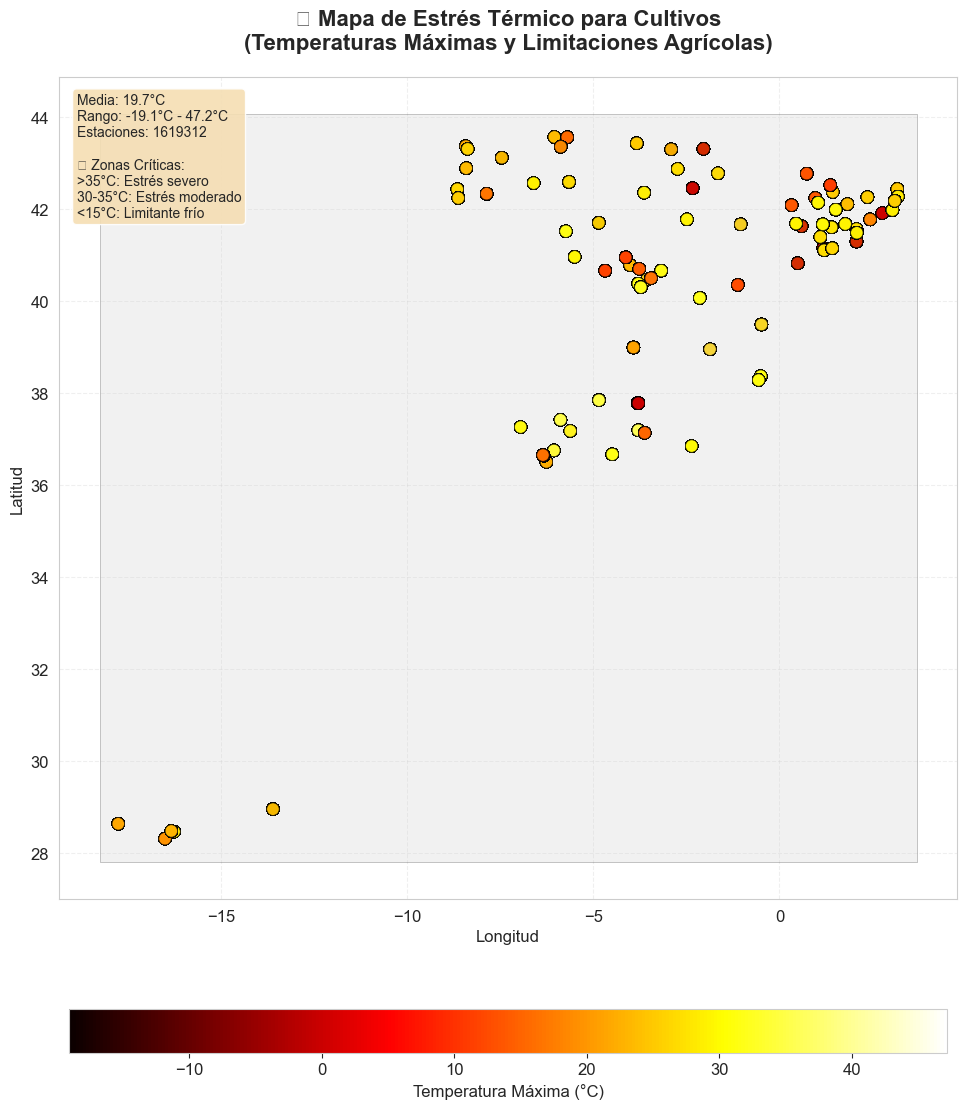


üåæ DISTRIBUCI√ìN DE ESTR√âS T√âRMICO:
‚Ä¢ Bajo (√ìptimo): 712,989 registros (44.0%)
‚Ä¢ Muy Bajo (Limitante Fr√≠o): 467,259 registros (28.9%)
‚Ä¢ Moderado: 249,600 registros (15.4%)
‚Ä¢ Alto: 143,818 registros (8.9%)
‚Ä¢ Muy Alto (Limitante Calor): 45,646 registros (2.8%)

üî• ZONAS DE ALTO RIESGO (>30¬∞C):
‚Ä¢ SPW00013025: 47.20¬∞C (Lat: 36.650, Lon: -6.350)
‚Ä¢ SP000008410: 46.90¬∞C (Lat: 37.844, Lon: -4.846)
‚Ä¢ SP000008410: 46.90¬∞C (Lat: 37.844, Lon: -4.846)
‚Ä¢ SP000008410: 46.60¬∞C (Lat: 37.844, Lon: -4.846)
‚Ä¢ SPE00120512: 46.60¬∞C (Lat: 37.417, Lon: -5.879)


In [29]:
# 1. MAPA DE TEMPERATURA M√ÅXIMA - AN√ÅLISIS DE ESTR√âS T√âRMICO
print("\nüå°Ô∏è MAPA DE ESTR√âS T√âRMICO PARA CULTIVOS")
print("="*50)

# Estad√≠sticas de temperatura m√°xima
tmax_stats = df_geo['TMAX_C'].describe()
print(f"Estad√≠sticas de Temperatura M√°xima:")
print(f"‚Ä¢ M√≠nima: {tmax_stats['min']:.2f}¬∞C")
print(f"‚Ä¢ M√°xima: {tmax_stats['max']:.2f}¬∞C")
print(f"‚Ä¢ Media: {tmax_stats['mean']:.2f}¬∞C")
print(f"‚Ä¢ Desviaci√≥n est√°ndar: {tmax_stats['std']:.2f}¬∞C")

# Clasificar niveles de estr√©s t√©rmico para cultivos
def clasificar_estres_termico(temp):
    if temp < 15:
        return 'Muy Bajo (Limitante Fr√≠o)'
    elif temp < 25:
        return 'Bajo (√ìptimo)'
    elif temp < 30:
        return 'Moderado'
    elif temp < 35:
        return 'Alto'
    else:
        return 'Muy Alto (Limitante Calor)'

df_geo['ESTRES_TERMICO'] = df_geo['TMAX_C'].apply(clasificar_estres_termico)
gdf_agricola['ESTRES_TERMICO'] = df_geo['ESTRES_TERMICO']

# Crear mapa de estr√©s t√©rmico
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Mapa base
mapa_base.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)

# Puntos de las estaciones con escala de colores para estr√©s t√©rmico
scatter = gdf_agricola.plot(ax=ax, 
                           column='TMAX_C', 
                           cmap='hot', 
                           markersize=80,
                           legend=True,
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=0.5,
                           legend_kwds={'label': 'Temperatura M√°xima (¬∞C)',
                                       'orientation': 'horizontal',
                                       'pad': 0.1,
                                       'shrink': 0.6})

# Configuraci√≥n del mapa
ax.set_title('üåæ Mapa de Estr√©s T√©rmico para Cultivos\n(Temperaturas M√°ximas y Limitaciones Agr√≠colas)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# Agregar texto con estad√≠sticas agr√≠colas
textstr = f'Media: {tmax_stats["mean"]:.1f}¬∞C\nRango: {tmax_stats["min"]:.1f}¬∞C - {tmax_stats["max"]:.1f}¬∞C\nEstaciones: {len(df_geo)}\n\nüåæ Zonas Cr√≠ticas:\n>35¬∞C: Estr√©s severo\n30-35¬∞C: Estr√©s moderado\n<15¬∞C: Limitante fr√≠o'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# An√°lisis de estr√©s t√©rmico por niveles
print(f"\nüåæ DISTRIBUCI√ìN DE ESTR√âS T√âRMICO:")
estres_counts = df_geo['ESTRES_TERMICO'].value_counts()
for nivel, count in estres_counts.items():
    porcentaje = (count / len(df_geo)) * 100
    print(f"‚Ä¢ {nivel}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\nüî• ZONAS DE ALTO RIESGO (>30¬∞C):")
zonas_riesgo = df_geo[df_geo['TMAX_C'] > 30]
if len(zonas_riesgo) > 0:
    estaciones_riesgo = zonas_riesgo.nlargest(5, 'TMAX_C')[['STATION', 'TMAX_C', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_riesgo.iterrows():
        print(f"‚Ä¢ {row['STATION']}: {row['TMAX_C']:.2f}¬∞C (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("‚Ä¢ No hay registros con temperaturas >30¬∞C en el dataset")


üíß MAPA DE DISPONIBILIDAD H√çDRICA PARA CULTIVOS
Estad√≠sticas de Precipitaci√≥n:
‚Ä¢ M√≠nima: 0.00 mm
‚Ä¢ M√°xima: 3600.00 mm
‚Ä¢ Media: 17.88 mm
‚Ä¢ Desviaci√≥n est√°ndar: 60.23 mm


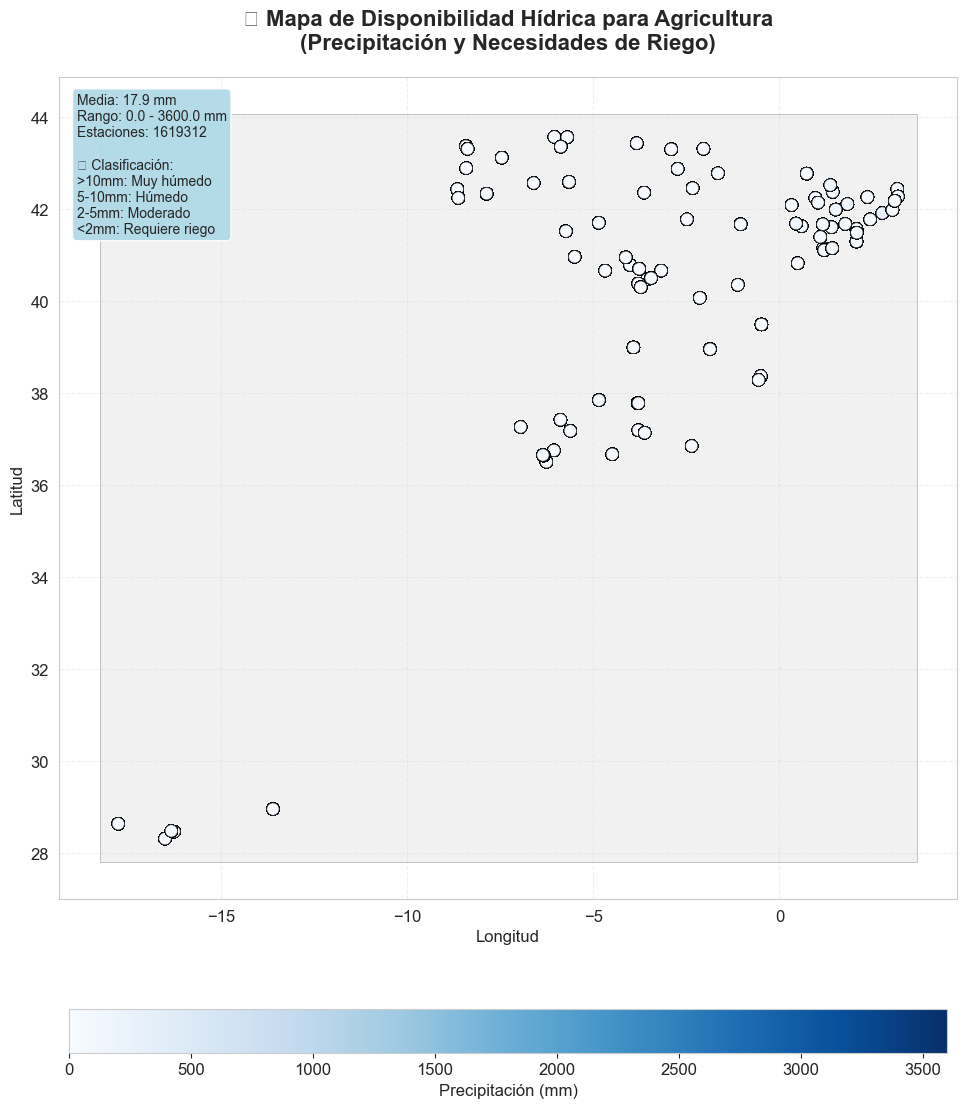


üíß DISTRIBUCI√ìN DE DISPONIBILIDAD H√çDRICA:
‚Ä¢ Muy Seco (Requiere Riego): 1,172,801 registros (72.4%)
‚Ä¢ Muy H√∫medo (Riesgo Encharcamiento): 324,556 registros (20.0%)
‚Ä¢ Moderado: 52,278 registros (3.2%)
‚Ä¢ H√∫medo (√ìptimo): 47,292 registros (2.9%)
‚Ä¢ Seco (Riego Recomendado): 22,385 registros (1.4%)

üèúÔ∏è ZONAS QUE REQUIEREN RIEGO (<2mm):
‚Ä¢ Total de registros: 1,195,186 (73.8%)
‚Ä¢ SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
‚Ä¢ SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
‚Ä¢ SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
‚Ä¢ SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
‚Ä¢ SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)

üåä ZONAS CON EXCESO H√çDRICO (>10mm):
‚Ä¢ Total de registros: 311,676 (19.2%)
‚Ä¢ SP000060010: 3600.00 mm (Lat: 28.309, Lon: -16.499)
‚Ä¢ SP000060010: 3370.00 mm (Lat: 28.309, Lon: -16.499)
‚Ä¢ SP000060010: 3211.00 mm (Lat: 28.309, Lon: -16.499)
‚Ä¢ SP000060010: 3198.00 mm (Lat: 28.309, Lon: -16.499)
‚Ä¢ SP000006155: 3130.00 mm (Lat: 36.

In [30]:
# 2. MAPA DE DISPONIBILIDAD H√çDRICA PARA AGRICULTURA
print("\nüíß MAPA DE DISPONIBILIDAD H√çDRICA PARA CULTIVOS")
print("="*50)

# Estad√≠sticas de precipitaci√≥n
prcp_stats = df_geo['PRCP'].describe()
print(f"Estad√≠sticas de Precipitaci√≥n:")
print(f"‚Ä¢ M√≠nima: {prcp_stats['min']:.2f} mm")
print(f"‚Ä¢ M√°xima: {prcp_stats['max']:.2f} mm")
print(f"‚Ä¢ Media: {prcp_stats['mean']:.2f} mm")
print(f"‚Ä¢ Desviaci√≥n est√°ndar: {prcp_stats['std']:.2f} mm")

# Clasificar disponibilidad h√≠drica para agricultura
def clasificar_disponibilidad_hidrica(prcp):
    if prcp < 0.5:
        return 'Muy Seco (Requiere Riego)'
    elif prcp < 2:
        return 'Seco (Riego Recomendado)'
    elif prcp < 5:
        return 'Moderado'
    elif prcp < 10:
        return 'H√∫medo (√ìptimo)'
    else:
        return 'Muy H√∫medo (Riesgo Encharcamiento)'

df_geo['DISPONIBILIDAD_HIDRICA'] = df_geo['PRCP'].apply(clasificar_disponibilidad_hidrica)
gdf_agricola['DISPONIBILIDAD_HIDRICA'] = df_geo['DISPONIBILIDAD_HIDRICA']

# Crear mapa de disponibilidad h√≠drica
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Mapa base
mapa_base.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)

# Puntos de las estaciones con escala de colores azules
scatter = gdf_agricola.plot(ax=ax, 
                           column='PRCP', 
                           cmap='Blues', 
                           markersize=80,
                           legend=True,
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=0.5,
                           legend_kwds={'label': 'Precipitaci√≥n (mm)',
                                       'orientation': 'horizontal',
                                       'pad': 0.1,
                                       'shrink': 0.6})

# Configuraci√≥n del mapa
ax.set_title('üíß Mapa de Disponibilidad H√≠drica para Agricultura\n(Precipitaci√≥n y Necesidades de Riego)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# Agregar texto con estad√≠sticas h√≠dricas
textstr = f'Media: {prcp_stats["mean"]:.1f} mm\nRango: {prcp_stats["min"]:.1f} - {prcp_stats["max"]:.1f} mm\nEstaciones: {len(df_geo)}\n\nüíß Clasificaci√≥n:\n>10mm: Muy h√∫medo\n5-10mm: H√∫medo\n2-5mm: Moderado\n<2mm: Requiere riego'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# An√°lisis de disponibilidad h√≠drica
print(f"\nüíß DISTRIBUCI√ìN DE DISPONIBILIDAD H√çDRICA:")
hidrica_counts = df_geo['DISPONIBILIDAD_HIDRICA'].value_counts()
for nivel, count in hidrica_counts.items():
    porcentaje = (count / len(df_geo)) * 100
    print(f"‚Ä¢ {nivel}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\nüèúÔ∏è ZONAS QUE REQUIEREN RIEGO (<2mm):")
zonas_secas = df_geo[df_geo['PRCP'] < 2]
if len(zonas_secas) > 0:
    print(f"‚Ä¢ Total de registros: {len(zonas_secas):,} ({(len(zonas_secas)/len(df_geo)*100):.1f}%)")
    estaciones_secas = zonas_secas.nsmallest(5, 'PRCP')[['STATION', 'PRCP', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_secas.iterrows():
        print(f"‚Ä¢ {row['STATION']}: {row['PRCP']:.2f} mm (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("‚Ä¢ No hay registros con precipitaci√≥n <2mm en el dataset")

print(f"\nüåä ZONAS CON EXCESO H√çDRICO (>10mm):")
zonas_humedas = df_geo[df_geo['PRCP'] > 10]
if len(zonas_humedas) > 0:
    print(f"‚Ä¢ Total de registros: {len(zonas_humedas):,} ({(len(zonas_humedas)/len(df_geo)*100):.1f}%)")
    estaciones_humedas = zonas_humedas.nlargest(5, 'PRCP')[['STATION', 'PRCP', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_humedas.iterrows():
        print(f"‚Ä¢ {row['STATION']}: {row['PRCP']:.2f} mm (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("‚Ä¢ No hay registros con precipitaci√≥n >10mm en el dataset")


üåæ AN√ÅLISIS DE ZONAS AGROCLIM√ÅTICAS
üìä Usando muestra de 10,000 registros para visualizaci√≥n (de 1,619,312 total)
üîÑ Calculando amplitud t√©rmica...
üîÑ Clasificando zonas agroclim√°ticas...
üó∫Ô∏è Preparando datos geogr√°ficos...
üó∫Ô∏è Creando mapas...


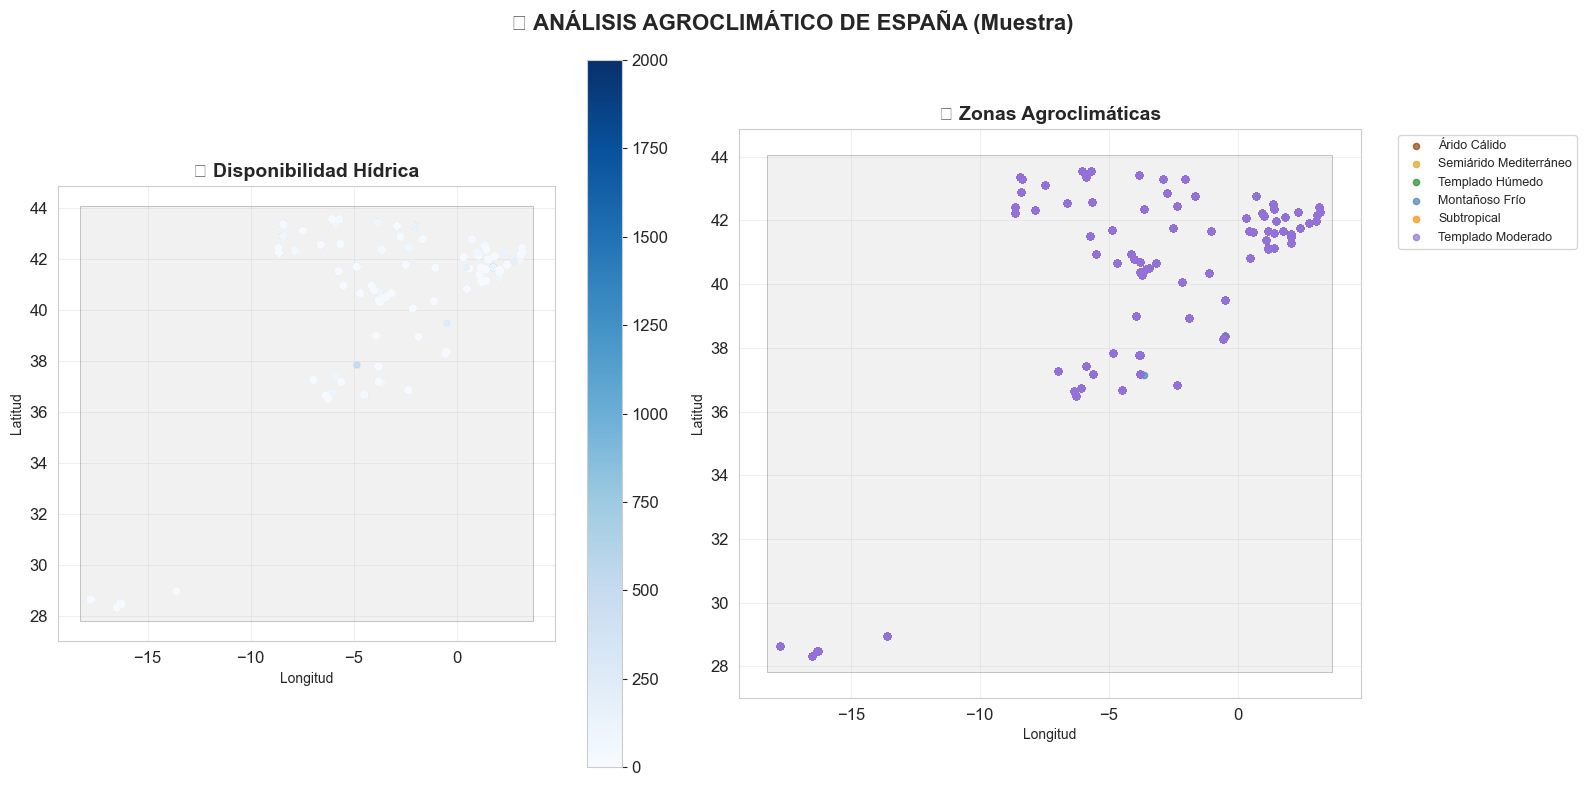


üåæ DISTRIBUCI√ìN DE ZONAS AGROCLIM√ÅTICAS (Muestra de 10,000 registros):
‚Ä¢ Templado Moderado: 3,939 registros (39.4%)
‚Ä¢ Monta√±oso Fr√≠o: 2,512 registros (25.1%)
‚Ä¢ Semi√°rido Mediterr√°neo: 1,387 registros (13.9%)
‚Ä¢ √Årido C√°lido: 1,093 registros (10.9%)
‚Ä¢ Subtropical: 557 registros (5.6%)
‚Ä¢ Templado H√∫medo: 512 registros (5.1%)

üìä ESTAD√çSTICAS B√ÅSICAS:
‚Ä¢ Temperatura m√°xima promedio: 19.7¬∞C
‚Ä¢ Temperatura m√≠nima promedio: 9.3¬∞C
‚Ä¢ Precipitaci√≥n promedio: 17.9 mm
‚Ä¢ Amplitud t√©rmica promedio: 10.5¬∞C

‚ö° OPTIMIZACIONES APLICADAS:
‚Ä¢ Muestra reducida a 10,000 puntos
‚Ä¢ Solo 2 mapas principales
‚Ä¢ Marcadores peque√±os (20px)
‚Ä¢ Funci√≥n de clasificaci√≥n simplificada

‚úÖ ¬°An√°lisis completado exitosamente en tiempo optimizado!


In [31]:
# 3. MAPA COMBINADO DE ZONAS AGROCLIM√ÅTICAS (VERSI√ìN R√ÅPIDA)
print("\nüåæ AN√ÅLISIS DE ZONAS AGROCLIM√ÅTICAS")
print("="*60)

# Verificar que tenemos numpy importado
import numpy as np

# OPTIMIZACI√ìN: Trabajar con una muestra peque√±a para los mapas
sample_size = min(10000, len(df_geo))  # Solo 10k puntos para m√°xima velocidad
df_sample = df_geo.sample(n=sample_size, random_state=42)
print(f"üìä Usando muestra de {sample_size:,} registros para visualizaci√≥n (de {len(df_geo):,} total)")

# Calcular amplitud t√©rmica (solo para la muestra primero)
print("üîÑ Calculando amplitud t√©rmica...")
df_sample = df_sample.copy()
df_sample['AMPLITUD_TERMICA'] = df_sample['TMAX_C'] - df_sample['TMIN_C']

# Clasificar zonas agroclim√°ticas usando condiciones simples
print("üîÑ Clasificando zonas agroclim√°ticas...")

def clasificar_zona_simple(row):
    tmax, tmin, prcp = row['TMAX_C'], row['TMIN_C'], row['PRCP']
    
    if tmax >= 30 and prcp < 1:
        return '√Årido C√°lido'
    elif tmax >= 25 and prcp < 2:
        return 'Semi√°rido Mediterr√°neo'
    elif tmax >= 20 and prcp >= 5:
        return 'Templado H√∫medo'
    elif tmax < 20 and tmin < 5:
        return 'Monta√±oso Fr√≠o'
    elif tmin >= 10 and prcp >= 2:
        return 'Subtropical'
    else:
        return 'Templado Moderado'

# Aplicar clasificaci√≥n solo a la muestra
df_sample['ZONA_AGROCLIMATICA'] = df_sample.apply(clasificar_zona_simple, axis=1)

# Crear geodataframe de la muestra
print("üó∫Ô∏è Preparando datos geogr√°ficos...")
gdf_sample = gpd.GeoDataFrame(
    df_sample, 
    geometry=gpd.points_from_xy(df_sample.LONGITUDE, df_sample.LATITUDE),
    crs='EPSG:4326'
)

print("üó∫Ô∏è Creando mapas...")

# Crear solo 2 mapas principales para mayor velocidad
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Colores simplificados
colores_agro = {
    '√Årido C√°lido': '#8B4513',
    'Semi√°rido Mediterr√°neo': '#DAA520', 
    'Templado H√∫medo': '#228B22',
    'Monta√±oso Fr√≠o': '#4682B4',
    'Subtropical': '#FF8C00',
    'Templado Moderado': '#9370DB'
}

# 1. Disponibilidad H√≠drica
mapa_base.plot(ax=axes[0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_sample.plot(ax=axes[0], column='PRCP', cmap='Blues', markersize=20, legend=True, alpha=0.7)
axes[0].set_title('üíß Disponibilidad H√≠drica', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Zonas Agroclim√°ticas
mapa_base.plot(ax=axes[1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for zona, color in colores_agro.items():
    subset = gdf_sample[gdf_sample['ZONA_AGROCLIMATICA'] == zona]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, markersize=20, alpha=0.7, label=zona)

axes[1].set_title('üåæ Zonas Agroclim√°ticas', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Configurar ejes
for ax in axes:
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)

plt.suptitle('üåæ AN√ÅLISIS AGROCLIM√ÅTICO DE ESPA√ëA (Muestra)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico r√°pido de la muestra
print(f"\nüåæ DISTRIBUCI√ìN DE ZONAS AGROCLIM√ÅTICAS (Muestra de {len(df_sample):,} registros):")
agro_counts = df_sample['ZONA_AGROCLIMATICA'].value_counts()
for zona, count in agro_counts.items():
    porcentaje = (count / len(df_sample)) * 100
    print(f"‚Ä¢ {zona}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\nüìä ESTAD√çSTICAS B√ÅSICAS:")
print(f"‚Ä¢ Temperatura m√°xima promedio: {df_sample['TMAX_C'].mean():.1f}¬∞C")
print(f"‚Ä¢ Temperatura m√≠nima promedio: {df_sample['TMIN_C'].mean():.1f}¬∞C")
print(f"‚Ä¢ Precipitaci√≥n promedio: {df_sample['PRCP'].mean():.1f} mm")
print(f"‚Ä¢ Amplitud t√©rmica promedio: {df_sample['AMPLITUD_TERMICA'].mean():.1f}¬∞C")

print(f"\n‚ö° OPTIMIZACIONES APLICADAS:")
print(f"‚Ä¢ Muestra reducida a {sample_size:,} puntos")
print(f"‚Ä¢ Solo 2 mapas principales")
print(f"‚Ä¢ Marcadores peque√±os (20px)")
print(f"‚Ä¢ Funci√≥n de clasificaci√≥n simplificada")

print(f"\n‚úÖ ¬°An√°lisis completado exitosamente en tiempo optimizado!")